<a href="https://colab.research.google.com/github/fabiolapugli/Churn_Prediction/blob/master/ChurnPrediction_KNN_Fabiola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Rotatividade - KNN  (CHURN)**





# **Índice**


1. Preparando ambiente de desenvolvimento
        1.1) Instalando requerimentos
        1.2) Importando bibliotecas




2. Análise exploratória
        2.1) Importando dados
        2.2) Tratamento de inicial
        2.3) Análise de variáveis categóricas



3. Pré-processamento dos dados
        3.1) Normalizando variáveis para o modelo
        3.2) Outliers
        3.3) Correlação com o target
        3.4) Rankeando as features
        3.5) Oversampling
        3.6) Separação em treinamento e teste



4. Classificadores
        4.1) KNN


5. Resultados



### **1.   Importando as bibliotecas e o dataset**



In [72]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML
from collections import Counter
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [73]:
import pandas as pd
url = "https://raw.githubusercontent.com/fabiolapugli/Churn_Prediction/master/Orange_Telco.csv"
# load dataset into Pandas DataFrame
contas = pd.read_csv(url)
df = contas.copy()

### **2. Análise Exploratória de Dados**


In [74]:
# Quantidade de linhas e colunas
df.shape

(5000, 21)

In [75]:

#profile  =  ProfileReport ( df , title = 'Pandas Profiling Report' )
#profile.to_notebook_iframe()


In [76]:
df.drop(columns='phone_number', axis=1, inplace=True)

### **3.   Pre Processamento dos Dados**


---



### Binarização dos dados categóricos


In [77]:
lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    df[col] = lb.fit_transform(df[col])

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['state'] =le.fit_transform(df['state'])

#Não usar para algoritmos de distancias


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   intl_plan                      5000 non-null   int64  
 4   voice_mail_plan                5000 non-null   int64  
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

## Normalizando as escalas via MinMax
* (dia, minuto) 
* Default 0 e 1

In [80]:
from sklearn.preprocessing import MinMaxScaler


msc = MinMaxScaler()
df = pd.DataFrame(msc.fit_transform(df), columns=df.columns)

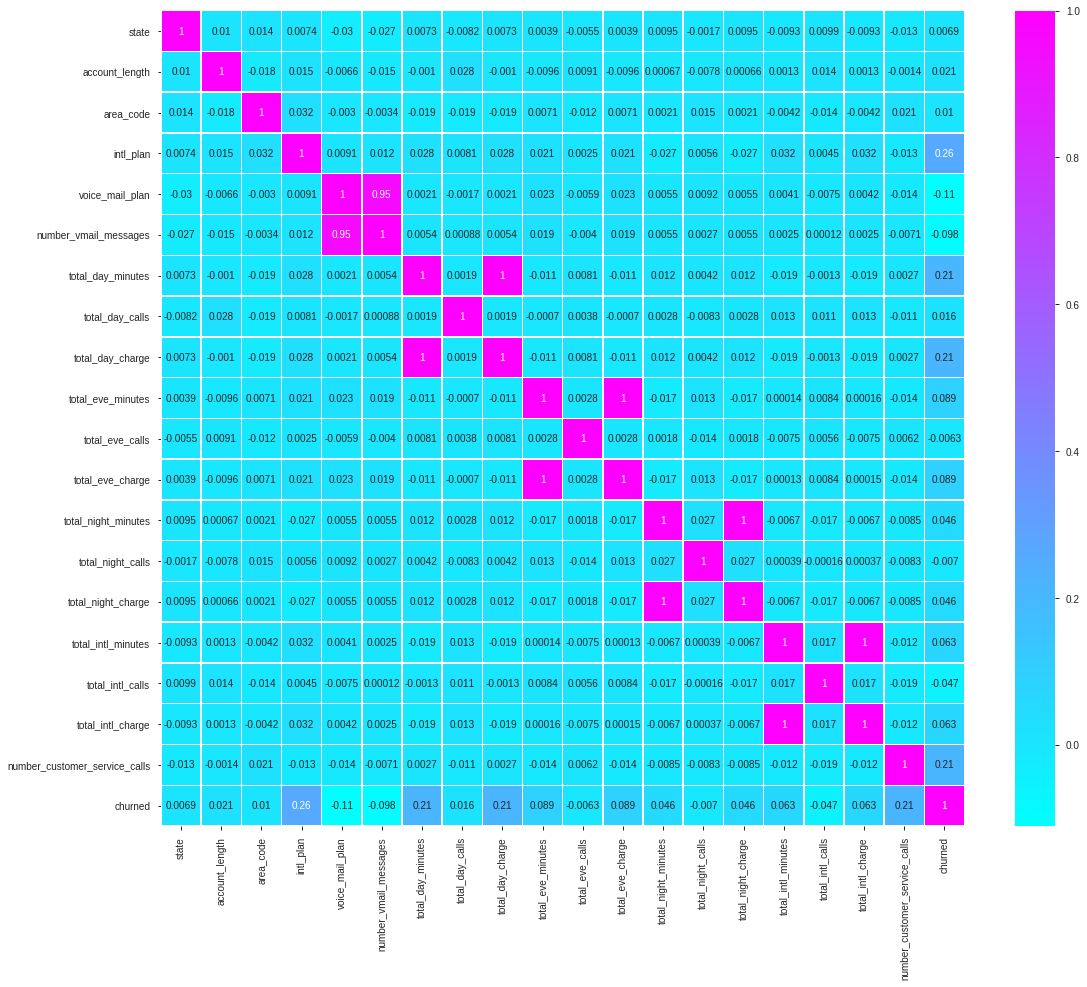

In [81]:
fig_dims = (18, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot = True, cmap="cool",  linewidths=.5, ax=ax)

## Separando os dados das classes

In [82]:
#Retirando colunas com alta correlação
df.drop(columns=['number_vmail_messages','total_day_minutes', 'total_day_charge','total_eve_minutes','total_eve_charge','total_night_minutes', 'total_night_charge', 'total_intl_minutes','total_intl_charge'], axis = 1 , inplace=True)


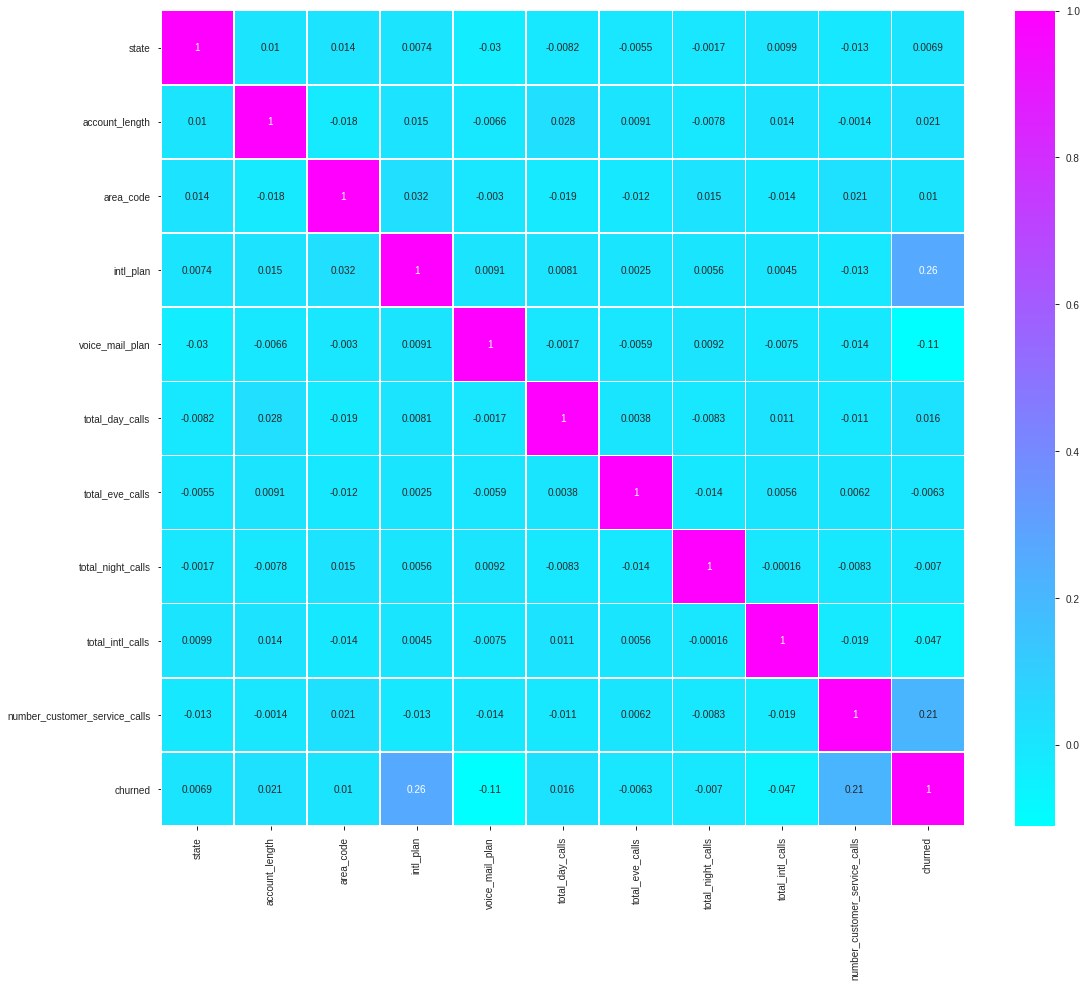

In [83]:
fig_dims = (18, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot = True, cmap="cool",  linewidths=.5, ax=ax)

In [84]:
df.shape

(5000, 11)

## Método Ensemble para Seleção de Variáveis

In [85]:
previsores = df.drop(['churned'], axis = 1)
target = df['churned']

In [86]:
previsores.shape, target.shape

((5000, 10), (5000,))

In [87]:
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier()
modelo.fit(previsores, target)

# Print dos Resultados
print(df.columns[0:10])
print(modelo.feature_importances_)

Index(['state', 'account_length', 'area_code', 'intl_plan', 'voice_mail_plan',
       'total_day_calls', 'total_eve_calls', 'total_night_calls',
       'total_intl_calls', 'number_customer_service_calls'],
      dtype='object')
[0.11488757 0.12242427 0.04472655 0.07231181 0.01533664 0.12195112
 0.12205327 0.11929096 0.12564712 0.14137068]


In [88]:
df_fit = pd.DataFrame(df.columns[0:10].values, columns=['churned'])
df_fit['importance'] = modelo.feature_importances_

df_fit.sort_values('importance', ascending= False, inplace=True) 
df_fit.plot

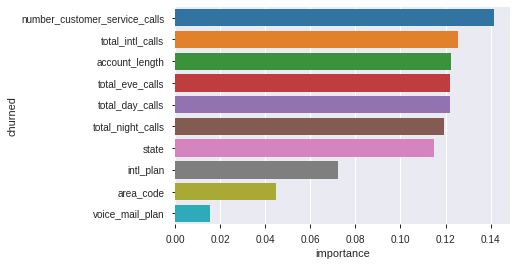

In [89]:
sns.barplot(x='importance', y='churned', data=df_fit)

In [90]:
#Mantendo as 6 principais colunas 
df.drop(columns=['voice_mail_plan','area_code', 'intl_plan','state'], axis = 1 , inplace=True)
previsores = df.drop(['churned'], axis = 1)
target = df['churned']

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   float64
 1   total_day_calls                5000 non-null   float64
 2   total_eve_calls                5000 non-null   float64
 3   total_night_calls              5000 non-null   float64
 4   total_intl_calls               5000 non-null   float64
 5   number_customer_service_calls  5000 non-null   float64
 6   churned                        5000 non-null   float64
dtypes: float64(7)
memory usage: 273.6 KB


## **Balanceamento de Classes**

Oversample (superamostragem)
É uma técnica utilizada para redreplicar de forma aleatório os elementos da classe com menor número de amostras

Alguns Algoritmos:

Random oversampling
SMOTE
ADASYN

In [92]:
target.value_counts()

0.0    4293
1.0     707
Name: churned, dtype: int64

In [93]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(sampling_strategy="minority")
previsores, target = smt.fit_sample(previsores, target)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [94]:
counter = Counter(target)
print(counter)

Counter({0.0: 4293, 1.0: 4293})


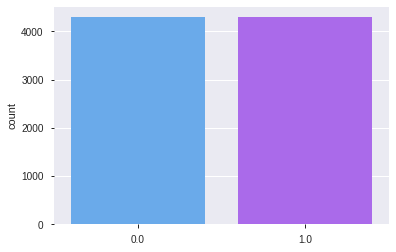

In [95]:
ax = sns.countplot(x=target, palette = 'cool')

## **Separação em Treino e Teste**

In [96]:
target_names = ['No_churned','churned']

test_size = 0.2
seed = 32

P_treino, P_teste, Target_treino, Target_teste = train_test_split(previsores, target, test_size = test_size, random_state = seed)

In [97]:
P_treino.shape, P_teste.shape, Target_treino.shape, Target_teste.shape

((6868, 6), (1718, 6), (6868,), (1718,))

## **Criando o modelo (KNN) - Vs0.1**

In [98]:
df_treino = pd.DataFrame()
df_teste = pd.DataFrame()

df_treino['CHURNED'] = Target_treino
df_teste['CHURNED'] = Target_teste

target_names = ['No_churned','churned']

test_size = 0.2
seed = 32


In [99]:
df_treino.shape, df_teste.shape

((6868, 1), (1718, 1))

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(P_treino, Target_treino)
previsao_knn = knn.predict(P_teste)
report = classification_report(Target_teste, previsao_knn)


In [101]:
print("Previsão KNN")
print(report)

Previsão KNN
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.80       887
         1.0       0.75      0.96      0.84       831

    accuracy                           0.82      1718
   macro avg       0.85      0.83      0.82      1718
weighted avg       0.85      0.82      0.82      1718



In [102]:
print("Teste")
print(confusion_matrix(Target_teste, previsao_knn))


Teste
[[617 270]
 [ 31 800]]


In [103]:
from sklearn.model_selection import KFold

# Avaliação usando Cross Validation

# Definindo os valores para os folds - definido de acordo com seu dataset
num_folds = 10
seed = 32

#Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

model_knn = KNeighborsClassifier(n_neighbors=3)


resultado = cross_val_score(model_knn, previsores, target, cv = kfold)
print(resultado)
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

[0.84749709 0.82305006 0.8661234  0.85215367 0.85681024 0.84982538
 0.85897436 0.85897436 0.83100233 0.85664336]
Acurácia Final: 85.011%
